The dataset used in this project, House price prediction, was downloaded from Kaggle.

# House price prediction

This dataset contains samples of property sales in Usa . The main goal of this project is to train a model that can predict the property sale price . Such information is invaluable for real estate investors as it can serve as a solid foundation to plan future purchases and understand how the real estate market is evolving.

First, the entire dataset will be explored through EDA. Then, it is going be a straightforward regression problem where the model performance is evaluated by mean absolute error (MAE). This project will focus on a step-by-step Exploratory Data Analysis and  XGBoost model development process.

## Import dataset and libraries

In [90]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
from scipy.special import boxcox1p
import xgboost as xgb
from xgboost import XGBRegressor
pd.set_option("display.max_rows",None,'display.max_columns',None)


from sklearn.metrics import explained_variance_score

from sklearn.model_selection import train_test_split,GridSearchCV



## Quick overview of the data

In [51]:
#Load Data into a Dataframe and Parse dates
df=pd.read_csv('data.csv',parse_dates=['date'])

In [52]:
y_or=df['price']

In [53]:
#show data
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [54]:
#let's look at the type of the futures and check if there are missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null datetime64[ns]
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: datetime64[ns](1), float64(4), int64(9), object(4)
memory usage: 647.0+ KB


In [55]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [56]:
df.shape

(4600, 18)

This dataset has 4600 entries with 18 columns. It contains the information that we can expect to find in any real estate ads. such as the address of the property, the size of the property descrbed in square feet, the built and renovation year, the number of bathrooms bedroom, the condition and our target variable, the Price. 
The dataset contains no null values.

# EDA

# Sales price analysis (Target variable)

We start our Exploratory Data Analysis looking at the Target Variable in order to check if there are some outliers 

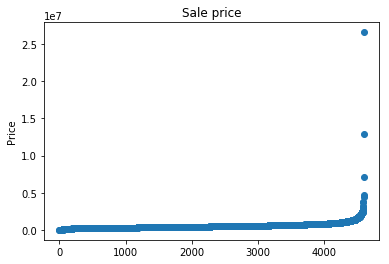

In [57]:

plt.scatter(range(len(df['price'])),df['price'].sort_values())
plt.title('Sale price')
plt.ylabel('Price')
plt.show()

As we can see from the graphs above there are some outliers (property with very high sale price) and some other with sale price equal to 0. Let's remove these outliers and plot again the graph in order to see how it changed.

In [58]:
#dropping the row whith with excessively high and excessively low price

df=df.drop(df[df.price > df.price.quantile(0.99)].index,axis=0)
df=df.drop(df[df.price < df.price.quantile(0.02)].index,axis=0)

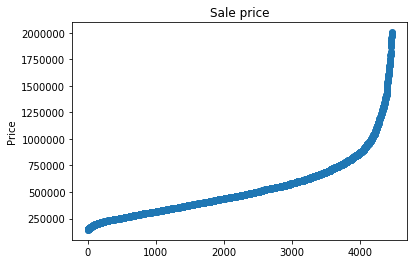

In [59]:
#Plot of the price variable
plt.scatter(range(len(df['price'])),df['price'].sort_values())
plt.title('Sale price')
plt.ylabel('Price')
plt.show()


Now let's plot the distribution  for the sale price

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The skewness of the distribution is: 1.7063869042455915


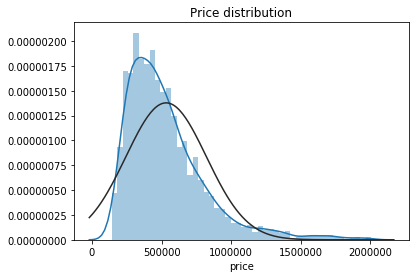

In [60]:
sns.distplot(df.price, fit=norm)
(mu, sigma) = norm.fit(df['price'])
plt.title('Price distribution')
print('The skewness of the distribution is:',skew(df['price']))

The distribution of sale price is right skewned. We will fix the skewness of the distribution on the preprocessing step

# Correlation map

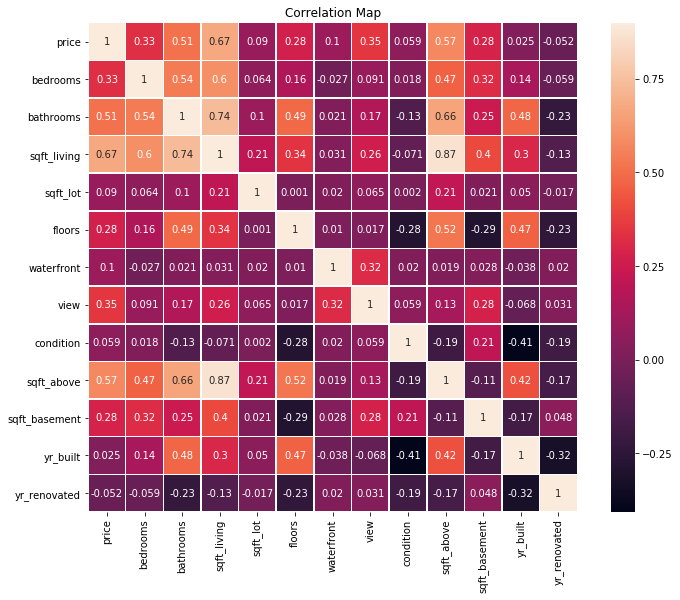

In [61]:
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,annot=True,linewidths=.5)
plt.title('Correlation Map')
plt.show()

As we can see from the correlation map the variables that are highly correlated with the target price are the number of bathrooms (0.52), the square feet living (0.66) and the square feet above (0.56).

# Analisys of Categorical Feautures

Let's take a look at the box plot which highlights the relationship between each categorical variables and the target variable

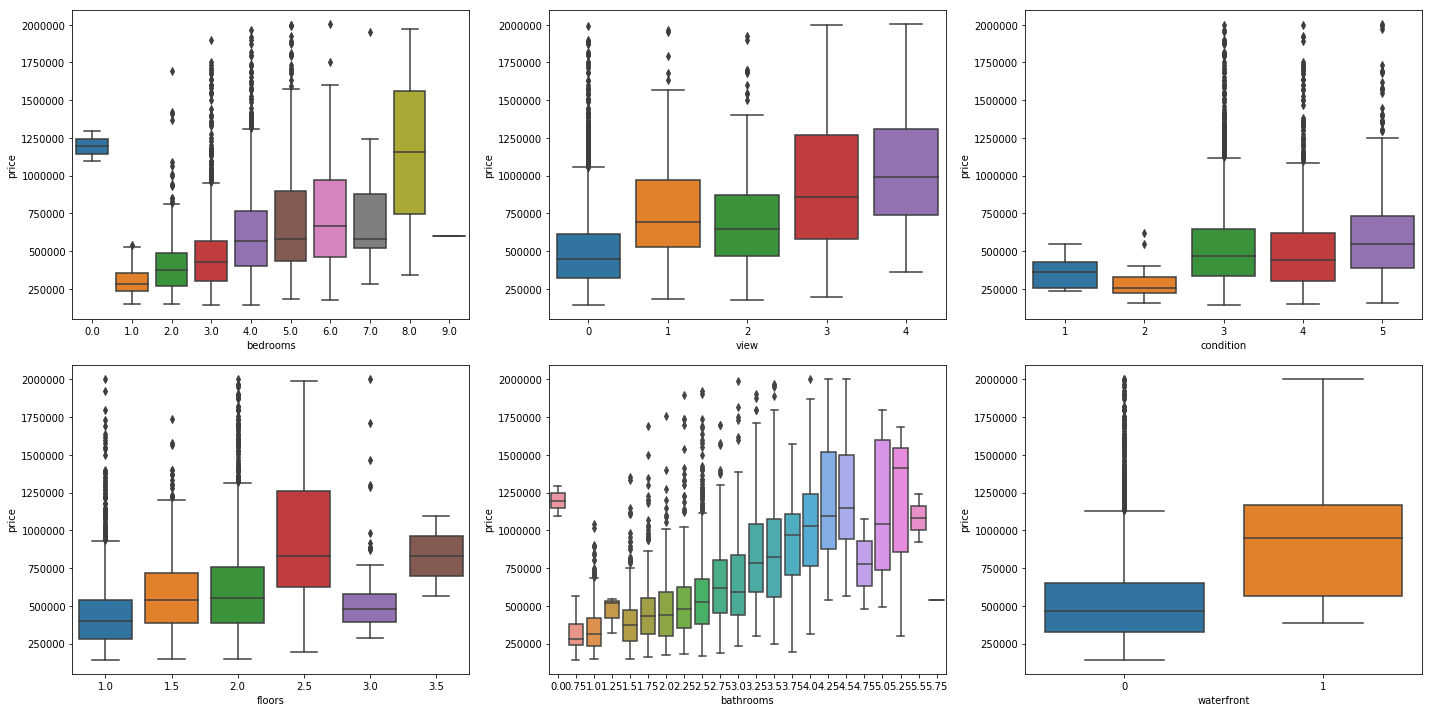

In [62]:
cols=['bedrooms', 'view', 'condition','floors','bathrooms','waterfront']
fig, axs = plt.subplots(figsize=(20,10),nrows=2, ncols=3)
for ax,b in zip(axs.flatten(),cols):
        sns.boxplot(x=b,y='price',data=df, ax=ax)                
fig.tight_layout()
plt.show()

As we can see the categorical feautures behave as expected, the price is higher for the property with no bedrooms and bathroom, i guess that they are offices or business premises, and the price get higher as the number of bedrooms and bathrooms increase.
The house that enjoy a sea view has generally a higher price. 


<Figure size 1800x720 with 0 Axes>

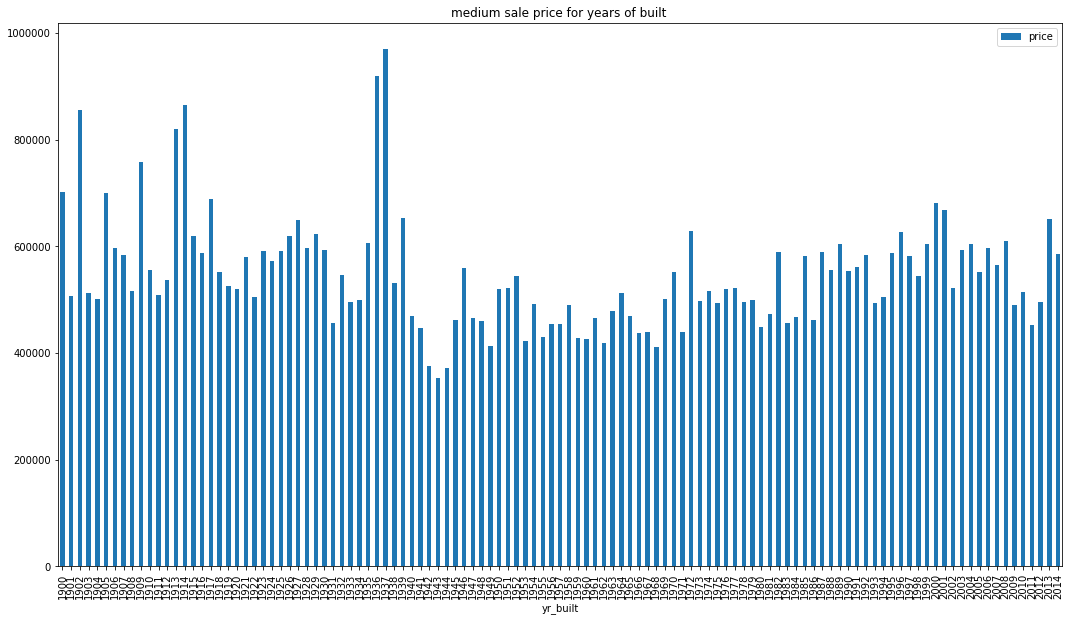

In [63]:
#Plot medium sale price for years of built 
plt.figure(figsize=(25,10))
m_c_b=df[['price','yr_built']].groupby(['yr_built']).mean().plot(kind='bar',figsize=(18,10))
plt.title('medium sale price for years of built ')
plt.show()

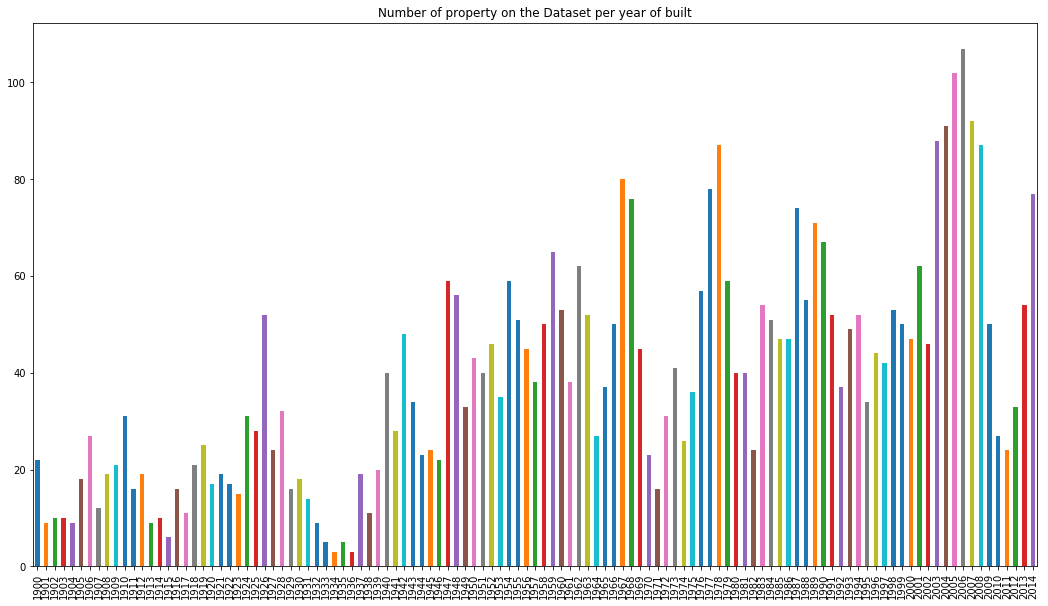

In [64]:
df.yr_built.value_counts().sort_index().plot(kind='bar',figsize=(18,10))
plt.title('Number of property on the Dataset per year of built')
plt.show()

The first plot above highlight that the year of built does not affect the avarage house price and the second highlight that newest built houses are the most present in our dataset.

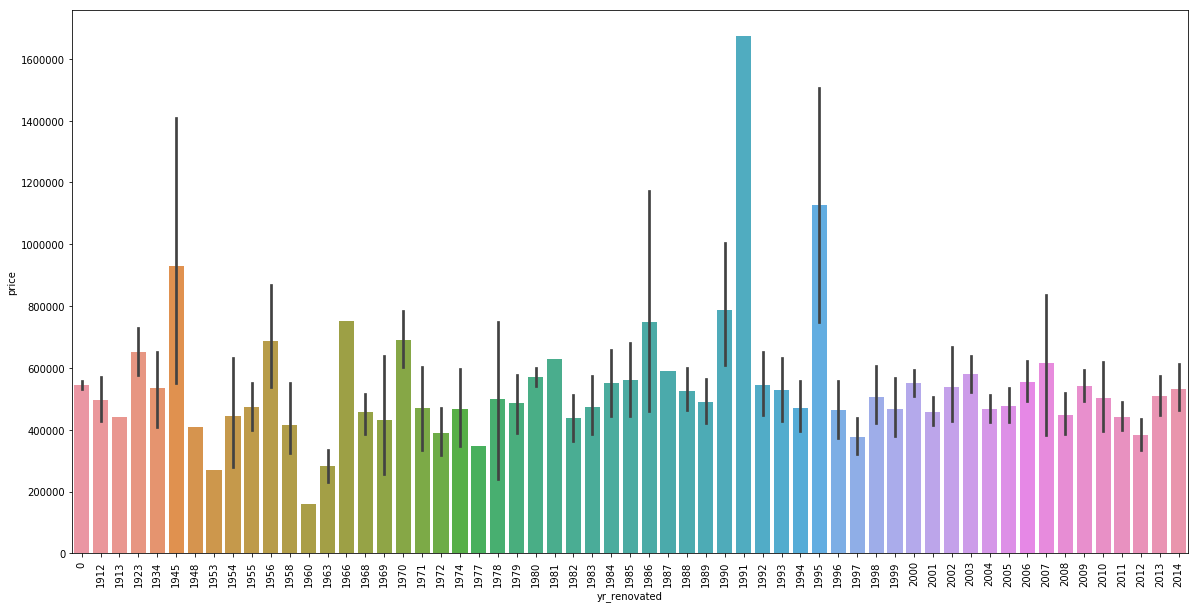

In [65]:
plt.figure(figsize=(20,10))
sns.barplot(x='yr_renovated',y='price',data = df)
plt.xticks(rotation = 'vertical')
plt.show()

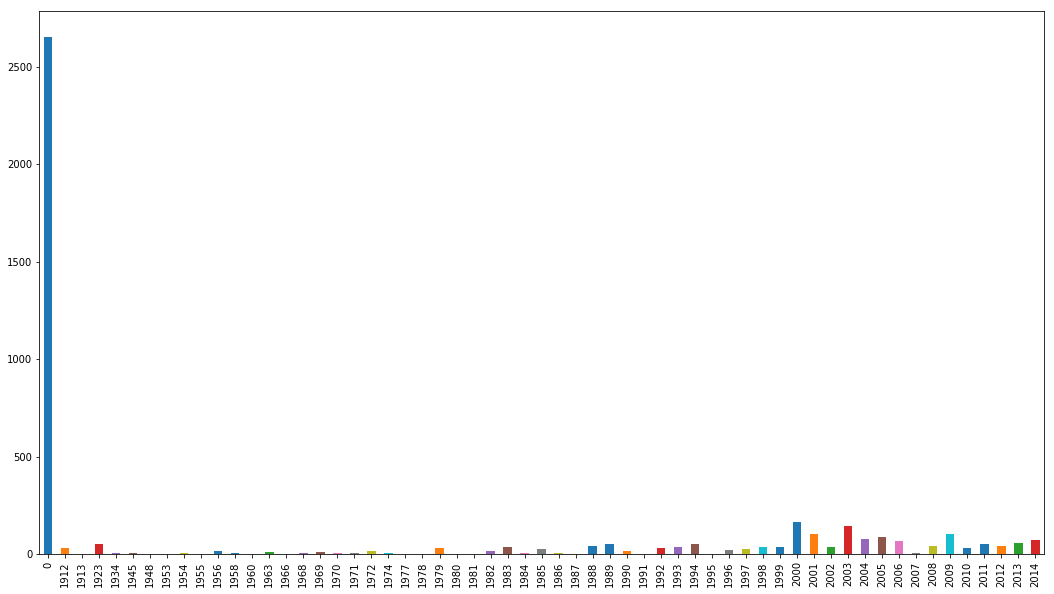

In [66]:
df.yr_renovated.value_counts().sort_index().plot(kind='bar',figsize=(18,10))
plt.show()

The first plot above highlight that the renovated year does not affect the avarage house price. The second shows that there are more then 2500 properties that have not been renovated or for which this information is not available.

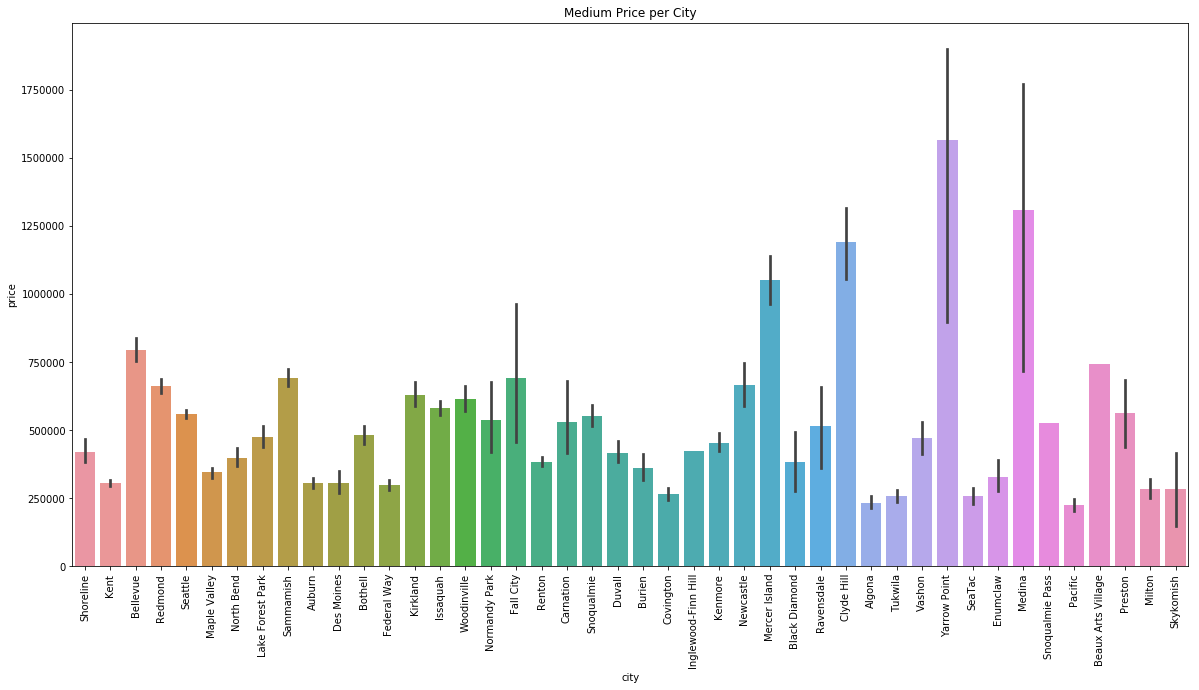

In [67]:
plt.figure(figsize=(20,10))
sns.barplot(x='city',y='price',data = df)
plt.title('Medium Price per City')
plt.xticks(rotation = 'vertical')
plt.show()

The plot above indicates that the medium sale price it is influenced by the city. 
Property average prices in Mercer Island, Clyde Hill ,Yarrow Port and Medina are higher then in the other cities

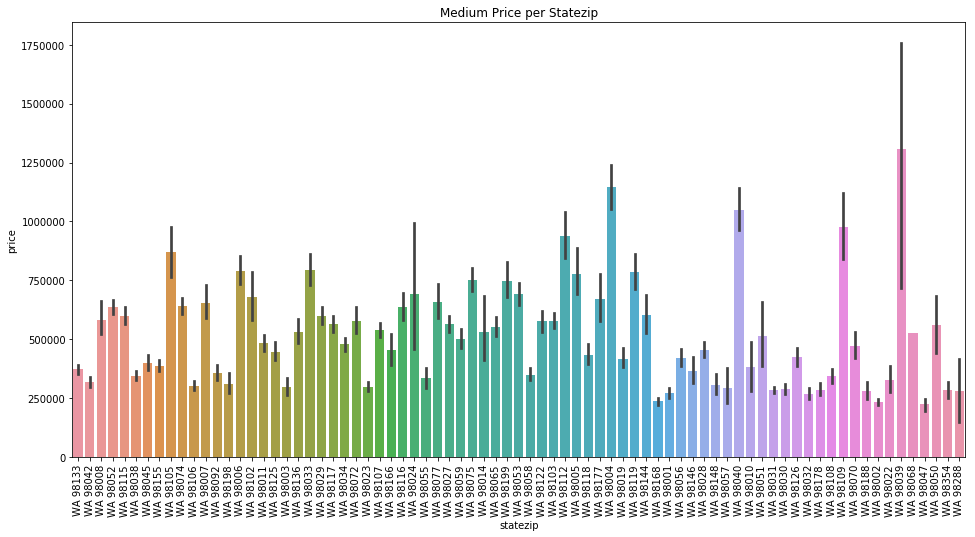

In [68]:
plt.figure(figsize=(16,8))
sns.barplot(x='statezip',y='price',data = df)
plt.title('Medium Price per Statezip')
plt.xticks(rotation = 'vertical')
plt.show()

In [69]:
#Country feautures analysis
df.country.unique()

array(['USA'], dtype=object)

The dataset conains only property in USA so the country columns contains only a single value. This columns is useless for our prediction then we will delate it during the preprocessing step

# Analysis of numerical Feautures

The plot above indicates that the medium sale price is influenced by the statezip. 

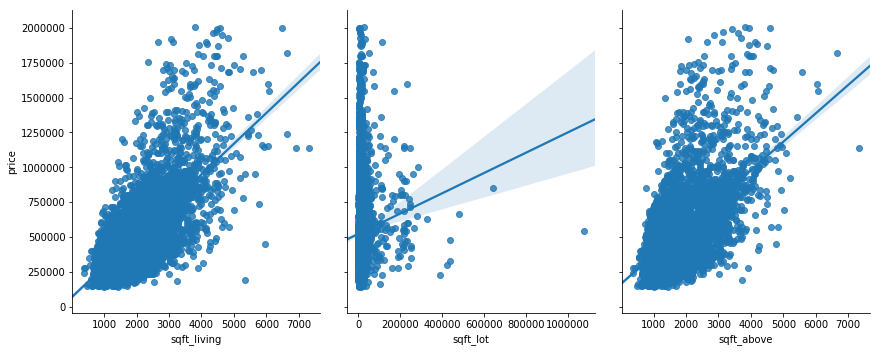

In [70]:
sns.pairplot(x_vars=['sqft_living','sqft_lot','sqft_above'],y_vars='price',data=df,kind="reg",height=5, aspect=.8)
plt.show()

As we can see from the above (and as it should be expected) there is a positive correlation between all the numerical feautures that indicates the square feet of the properties and the target variable.

# Preprocessing

In the EDA we noticed that  the target variable is right skewned. As models love normally distributed data , we need to transform this variable and make it more normally distributed, to achive this result I multiplied the target variable by '1+ logx'.

The skewness of the distribution is: 0.21765100328085007


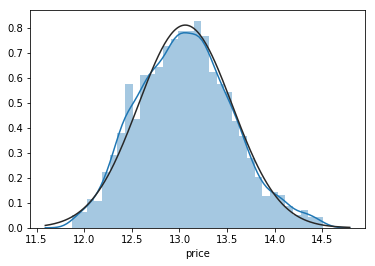

In [71]:
df["price"] = np.log1p(df["price"])
#Check the new distribution 
sns.distplot(df['price'] , fit=norm);
print('The skewness of the distribution is:',skew(df['price']))

Now the target variable looks more normal.
Let's normalize also the numerical feautures this time with a box cox transformation

In [72]:
skewed_feats = df[['sqft_living','sqft_lot','sqft_above']].apply(lambda x: skew(x)).sort_values(ascending=False)
print('Skew in numerical features:')
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

Skew in numerical features:


,Skew
sqft_lot,11.626628
sqft_above,1.216420
sqft_living,1.054470


In [73]:
skewness = skewness[abs(skewness) > 0.8]

skewed_features = skewness.index
lam = 0.14
for feat in skewed_features:
    
    df[feat] = boxcox1p(df[feat], lam)

In [74]:
skewed_feats = df[['sqft_living','sqft_lot','sqft_above']].apply(lambda x: skew(x)).sort_values(ascending=False)
print('Skew in numerical features After transformation:')
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

Skew in numerical features After transformation:


,Skew
sqft_lot,1.639677
sqft_above,0.333071
sqft_living,0.024900


# Encoding Categorical Variables

In [75]:
#List of categorical variables to encode
dum=['bedrooms', 'view', 'condition','floors','bathrooms','waterfront','city','statezip']

In [76]:
#create dummy variables and divide the Datasets in futures and target 
y=df['price']
df=pd.concat([df, pd.get_dummies(df[dum],drop_first=True)], axis=1)
X=df.drop(['bedrooms', 'view', 'condition','floors','bathrooms','waterfront','street','city','statezip','price','date','street','city','statezip','country'],axis=1)

Split the dataset into train and test subsets

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# Modelling

In this Excercise I we will use XGBoost.


XGBoost is an ensemble learning method.In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

I also used Gridsearchcv in order to find the best hyperparameters for the model

In [85]:
xgb.DMatrix(data=X_train, label=y_train)
gbm_param_grid = {
    
    'n_estimators': [300,400,500,600,700,800],
    
    'n_jobs': [-1],
    
    'max_depth':[2,3,4,5],       
    
    'colsample_bytree':[0.8],
    
    'colsample_bylevel':[.2],
    
    'learning_rate':[0.1,0.2,0.3,0.4,0.5,1,0.01,0.05]
    
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(param_grid=gbm_param_grid,estimator=gbm,scoring='neg_mean_squared_error',cv=4,verbose=1)


# Fit grid_mse to the data
grid_mse.fit(X_train,y_train)

Fitting 4 folds for each of 192 candidates, totalling 768 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 768 out of 768 | elapsed: 12.2min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [300, 400, 500, 600, 700, 800], 'n_jobs': [-1], 'max_depth': [2, 3, 4, 5], 'colsample_bytree': [0.8], 'colsample_bylevel': [0.2], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [86]:
print('The best hyperparameters among those tested are:',grid_mse.best_params_)

The best hyperparameters among those tested are: {'colsample_bylevel': 0.2, 'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 800, 'n_jobs': -1}


# Results

In [93]:
train=grid_mse.predict(X_train)
test=grid_mse.predict(X_test)
tes_train=np.expm1(train)
or_ytrain=np.expm1(y_train)
tes_test=np.expm1(test)
or_test=np.expm1(y_test)
train=mean_absolute_error(or_ytrain,tes_train)
test=mean_absolute_error(or_test,tes_test)
print('Mean Absolute error for train set is:',train)
print('Mean Absolute error for test set is:',test)
print('Explained Variance Score train:',explained_variance_score(or_ytrain,tes_train))
print('Explained Variance Score test:',explained_variance_score(or_test,tes_test))

Mean Absolute error for train set is: 72553.69201716229
Mean Absolute error for test set is: 85486.64153394535
Explained Variance Score train: 0.8406831891141474
Explained Variance Score test: 0.7595443029074179


# Conclusion

The mean absolute error in the test set is 85486 and the Explained variance score is 0.75. 
The model suffers of overfitting as the Mean absolute error  and the Explained Variance Score are far better in the train set then in the test set.
I think that with feauture engeniering and a stacked model built with other regressor algo